In [44]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('BTC-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-08,11604.553711,11800.064453,11558.431641,11754.045898,11754.045898,1.757206e+10
1,2020-08-09,11737.325195,11806.056641,11548.784180,11675.739258,11675.739258,1.748961e+10
2,2020-08-10,11662.256836,12045.140625,11662.256836,11878.111328,11878.111328,2.611411e+10
3,2020-08-11,11881.647461,11932.710938,11195.708984,11410.525391,11410.525391,2.703978e+10
4,2020-08-12,11404.596680,11748.396484,11249.605469,11584.934570,11584.934570,2.506455e+10


In [4]:
data.dropna(inplace=True)

In [5]:
len(data)

182

In [22]:
data_training = data[data['Date']<'2021-01-08'].copy()
len(data_training)

150

In [23]:
data_testing = data[data['Date']>'2021-01-07'].copy()
len(data_testing)

32

In [24]:
training_data = data_training.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,11604.553711,11800.064453,11558.431641,11754.045898,1.757206e+10
1,11737.325195,11806.056641,11548.784180,11675.739258,1.748961e+10
2,11662.256836,12045.140625,11662.256836,11878.111328,2.611411e+10
3,11881.647461,11932.710938,11195.708984,11410.525391,2.703978e+10
4,11404.596680,11748.396484,11249.605469,11584.934570,2.506455e+10


In [25]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[5.50718189e-02, 4.85930280e-02, 6.17857807e-02, 5.54909569e-02,
        7.06458902e-03],
       [6.00445851e-02, 4.87939071e-02, 6.14227489e-02, 5.28128478e-02,
        5.84615719e-03],
       [5.72330070e-02, 5.68088381e-02, 6.56926997e-02, 5.97340293e-02,
        1.33299120e-01],
       [6.54499694e-02, 5.30398020e-02, 4.81366075e-02, 4.37424592e-02,
        1.46978677e-01],
       [4.75827140e-02, 4.68609371e-02, 5.01647203e-02, 4.97073020e-02,
        1.17788656e-01],
       [5.44670022e-02, 4.84700649e-02, 4.89329698e-02, 5.65201047e-02,
        1.54107836e-01],
       [6.13679690e-02, 6.03574181e-02, 6.65656444e-02, 5.59979827e-02,
        1.05573306e-01],
       [6.12195812e-02, 5.40620067e-02, 6.96980295e-02, 5.93094983e-02,
        9.25238222e-02],
       [6.48895923e-02, 5.31132328e-02, 6.85123608e-02, 6.02365130e-02,
        5.15658575e-02],
       [6.59747217e-02, 6.73324005e-02, 7.11279243e-02, 7.26032876e-02,
        1.64533535e-01],
       [7.93170810e-02, 6.6549

In [26]:
training_data.shape

(150, 5)

In [27]:
X_train = []
Y_train = []

for i in range(10, training_data.shape[0]):
    X_train.append(training_data[i-10:i])
    Y_train.append(training_data[i,0])

In [28]:
X_train,Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(140, 10, 5)

In [30]:
X_train.shape[1]

10

In [14]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

In [15]:
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 10, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, epochs = 100, batch_size =50)

Epoch 1/100
3/3 [==============================] - 3s 23ms/step - loss: 0.0984 - accuracy: 0.0061
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0692 - accuracy: 0.0061
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0492 - accuracy: 0.0061
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0473 - accuracy: 0.0111
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0476 - accuracy: 0.0061
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0381 - accuracy: 0.0036
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0258 - accuracy: 0.0111
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0206 - accuracy: 0.0061
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0105 - accuracy: 0.0221
Epoch 10/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0100 - accuracy: 0.0096
Epoch 11/100
3/3 [=

3/3 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 0.0096
Epoch 84/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0036 - accuracy: 0.0071
Epoch 85/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0049 - accuracy: 0.0146
Epoch 86/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy: 0.0146
Epoch 87/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0034 - accuracy: 0.0146
Epoch 88/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0027 - accuracy: 0.0096
Epoch 89/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy: 0.0121
Epoch 90/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0037 - accuracy: 0.0096
Epoch 91/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0026 - accuracy: 0.0096
Epoch 92/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0041 - accuracy: 0.0096
Epoch 93/100
3/3 [=====

In [32]:
past_10_days = data_training.tail(10)
df = past_10_days.append(testing_data)
df.drop(['Date','Adj Close'],axis=1,inplace=True)
df.head()

,Open,High,Low,Close,Volume
143,27081.810547,27370.720703,25987.298828,27362.437500,4.526595e+10
144,27360.089844,28937.740234,27360.089844,28840.953125,5.128744e+10
145,28841.574219,29244.876953,28201.992188,29001.720703,4.675496e+10
146,28994.009766,29600.626953,28803.585938,29374.152344,4.073030e+10
147,29376.455078,33155.117188,29091.181641,32127.267578,6.786542e+10


In [33]:
inputs = scaler.transform(df)
inputs

array([[0.63475036, 0.57057586, 0.60474085, 0.58930233, 0.41632503],
       [0.64517291, 0.62310784, 0.65639867, 0.63986797, 0.50531073],
       [0.70065979, 0.63340413, 0.68807927, 0.64536627, 0.43832975],
       [0.70636905, 0.64533012, 0.71071711, 0.65810354, 0.34929724],
       [0.72069299, 0.76448906, 0.72153927, 0.75226085, 0.75030018],
       [0.82380092, 0.8132135 , 0.83296612, 0.77465368, 0.90989989],
       [0.84932706, 0.77404666, 0.70767549, 0.74694772, 0.9468189 ],
       [0.81809422, 0.80748203, 0.76406114, 0.81604992, 0.74559935],
       [0.89437113, 0.88935007, 0.88797027, 0.91290284, 0.86001228],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.0954276 , 1.05921493, 1.01307429, 1.04878897, 1.04943802],
       [1.1481201 , 1.04210499, 1.09368624, 1.03021608, 0.66338692],
       [1.12810409, 1.04156324, 0.98093817, 0.96530034, 0.92934054],
       [1.05665438, 0.93852341, 0.77641922, 0.86988891, 1.56981663],
       [0.95065433, 0.8789185 , 0.

In [34]:
X_test = []
Y_test = []
for i in range(10,inputs.shape[0]):
    X_test.append(inputs[i-10:i])
    Y_test.append(inputs[i,0])

In [35]:
inputs[10,0]

1.095427602922859

In [36]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape,Y_test.shape

((32, 10, 5), (32,))

In [37]:
Y_Pred = model.predict(X_test)
Y_Pred,Y_test

(array([[0.9843165],
        [1.0479592],
        [1.1166235],
        [1.1941116],
        [1.2744756],
        [1.3490012],
        [1.4092746],
        [1.4854312],
        [1.5327256],
        [1.5449944],
        [1.5206214],
        [1.4739709],
        [1.4132123],
        [1.3855183],
        [1.433965 ],
        [1.4544821],
        [1.4463832],
        [1.3927383],
        [1.347096 ],
        [1.307176 ],
        [1.2692503],
        [1.2131784],
        [1.1573036],
        [1.1245103],
        [1.1344507],
        [1.1524587],
        [1.1500452],
        [1.1528988],
        [1.1589413],
        [1.1811388],
        [1.2312065],
        [1.3045628]], dtype=float32),
 array([1.0954276 , 1.1481201 , 1.12810409, 1.05665438, 0.95065433,
        0.89068224, 1.01839848, 1.08699835, 0.99954207, 0.97489762,
        0.96098698, 0.99282237, 0.97064532, 0.95189177, 0.77466995,
        0.85587427, 0.82136527, 0.82965831, 0.83238547, 0.84007903,
        0.76056554, 0.90579666, 0.90494

In [38]:
scaler.scale_

array([3.74535712e-05, 3.35234962e-05, 3.76297782e-05, 3.42002804e-05,
       1.47780054e-11])

In [39]:
scale = 1/3.74535712e-05
scale

26699.723630092714

In [41]:
Y_test = Y_test * scale
Y_Pred = Y_Pred * scale

In [42]:
Y_Pred,Y_test

(array([[7.01694848e+08],
        [7.47064128e+08],
        [7.96013248e+08],
        [8.51252480e+08],
        [9.08542016e+08],
        [9.61669440e+08],
        [1.00463693e+09],
        [1.05892704e+09],
        [1.09264205e+09],
        [1.10138816e+09],
        [1.08401331e+09],
        [1.05075725e+09],
        [1.00744397e+09],
        [9.87701568e+08],
        [1.02223808e+09],
        [1.03686426e+09],
        [1.03109075e+09],
        [9.92848576e+08],
        [9.60311296e+08],
        [9.31853376e+08],
        [9.04817024e+08],
        [8.64844800e+08],
        [8.25012992e+08],
        [8.01635520e+08],
        [8.08721728e+08],
        [8.21559168e+08],
        [8.19838656e+08],
        [8.21872960e+08],
        [8.26180480e+08],
        [8.42004480e+08],
        [8.77696640e+08],
        [9.29990464e+08]], dtype=float32),
 array([7.80903217e+08, 8.18466391e+08, 8.04197475e+08, 7.53262746e+08,
        6.77697939e+08, 6.34945319e+08, 7.25991064e+08, 7.74894215e+08,
       

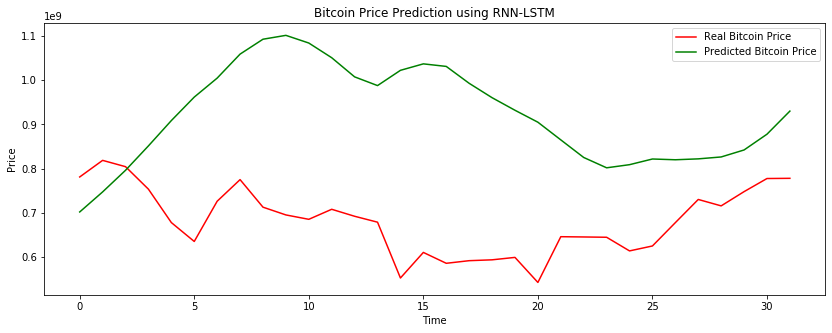

In [46]:

plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_Pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
inputs

array([[0.63475036, 0.57057586, 0.60474085, 0.58930233, 0.41632503],
       [0.64517291, 0.62310784, 0.65639867, 0.63986797, 0.50531073],
       [0.70065979, 0.63340413, 0.68807927, 0.64536627, 0.43832975],
       [0.70636905, 0.64533012, 0.71071711, 0.65810354, 0.34929724],
       [0.72069299, 0.76448906, 0.72153927, 0.75226085, 0.75030018],
       [0.82380092, 0.8132135 , 0.83296612, 0.77465368, 0.90989989],
       [0.84932706, 0.77404666, 0.70767549, 0.74694772, 0.9468189 ],
       [0.81809422, 0.80748203, 0.76406114, 0.81604992, 0.74559935],
       [0.89437113, 0.88935007, 0.88797027, 0.91290284, 0.86001228],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.0954276 , 1.05921493, 1.01307429, 1.04878897, 1.04943802],
       [1.1481201 , 1.04210499, 1.09368624, 1.03021608, 0.66338692],
       [1.12810409, 1.04156324, 0.98093817, 0.96530034, 0.92934054],
       [1.05665438, 0.93852341, 0.77641922, 0.86988891, 1.56981663],
       [0.95065433, 0.8789185 , 0.